In [ ]:
import re
import tensorflow_hub as hub
from tqdm import tqdm
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import seaborn as sns
nltk.download('punkt')
nltk.download('stopwords')
import pandas as pd
data = pd.read_csv('depression_detection.csv',encoding='latin-1')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


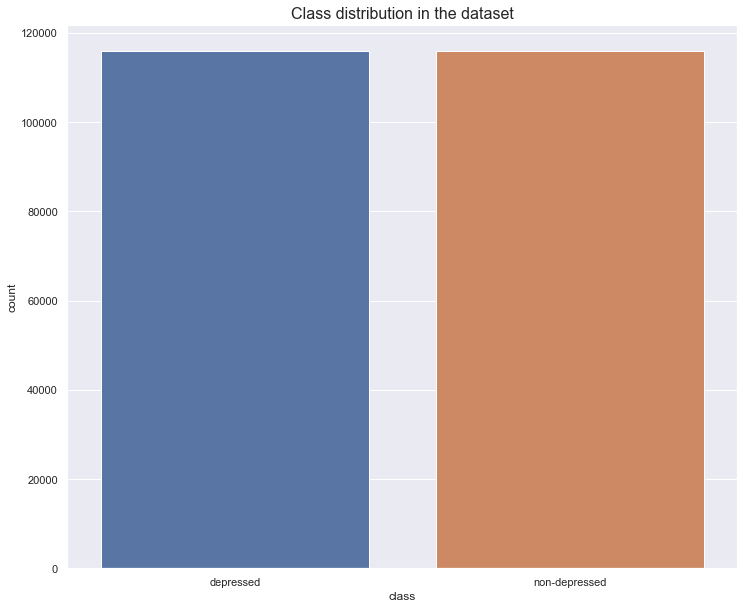

In [ ]:
g = sns.countplot(x='class', data=data)
g.set_title('Class distribution in the dataset', {'fontsize': 16})
g.figure.savefig('class_dist.png')

In [ ]:
data_suicide = data[data['class'] == 'depressed']
data_non_suicide = data[data['class'] == 'non-depressed']

In [ ]:
#Depressed data
print('separating into words...')
all_words_suicide = []
data_suicide['text'].apply(lambda s: all_words_suicide.extend([w.lower() for w in word_tokenize(s)]))

print('making frequency dataframe')
frequency_suicide = nltk.FreqDist(all_words_suicide)
unique_words_suicide = set(all_words_suicide)
unique_words_suicide = sorted(unique_words_suicide, key=lambda w: frequency_suicide[w], reverse=True)

frequency_suicide_df = {'word': [], 'frequency': []}
for w in unique_words_suicide:
    frequency_suicide_df['word'].append(w)
    frequency_suicide_df['frequency'].append(frequency_suicide[w])

frequency_suicide_df = pd.DataFrame(frequency_suicide_df)

separating into words...
making frequency dataframe


In [ ]:
# non-Depressed data
print('separating into words...')
all_words_non_suicide = []
data_non_suicide['text'].apply(lambda s: all_words_non_suicide.extend([w.lower() for w in word_tokenize(s)]))

print('making frequency dataframe')
frequency_non_suicide = nltk.FreqDist(all_words_non_suicide)
unique_words_non_suicide = set(all_words_non_suicide)
unique_words_non_suicide = sorted(unique_words_non_suicide, key=lambda w: frequency_non_suicide[w], reverse=True)

frequency_non_suicide_df = {'word': [], 'frequency': []}
for w in unique_words_non_suicide:
    frequency_non_suicide_df['word'].append(w)
    frequency_non_suicide_df['frequency'].append(frequency_non_suicide[w])

frequency_non_suicide_df = pd.DataFrame(frequency_non_suicide_df)

separating into words...
making frequency dataframe


In [ ]:
frequency_suicide_df.head()

,word,frequency
0,i,1739410
1,.,1371922
2,to,848929
3,",",825872
4,and,706686


In [ ]:
frequency_non_suicide_df.head()

,word,frequency
0,i,329611
1,.,268212
2,",",211688
3,and,189438
4,to,186766


In [ ]:
stopwords_filtered = stopwords.words('english')[:stopwords.words('english').index('aren')]

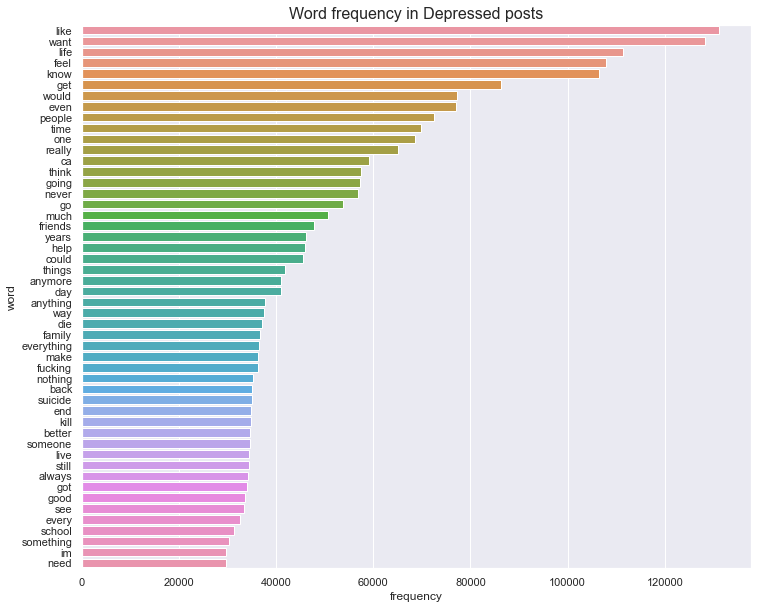

In [ ]:
filtered_frequency_suicide_df = frequency_suicide_df[~frequency_suicide_df['word'].isin(stopwords_filtered)]
filtered_frequency_suicide_df = filtered_frequency_suicide_df[filtered_frequency_suicide_df['word'].apply(lambda w: w.isalpha())]

sns.set(rc={'figure.figsize':(12, 10)})
g = sns.barplot(x="frequency",
                y="word",
                orient='h',
                data=filtered_frequency_suicide_df.head(50))
g.set_title('Word frequency in Depressed posts', {'fontsize': 16})
g.figure.savefig('word_frequency_suic.png')

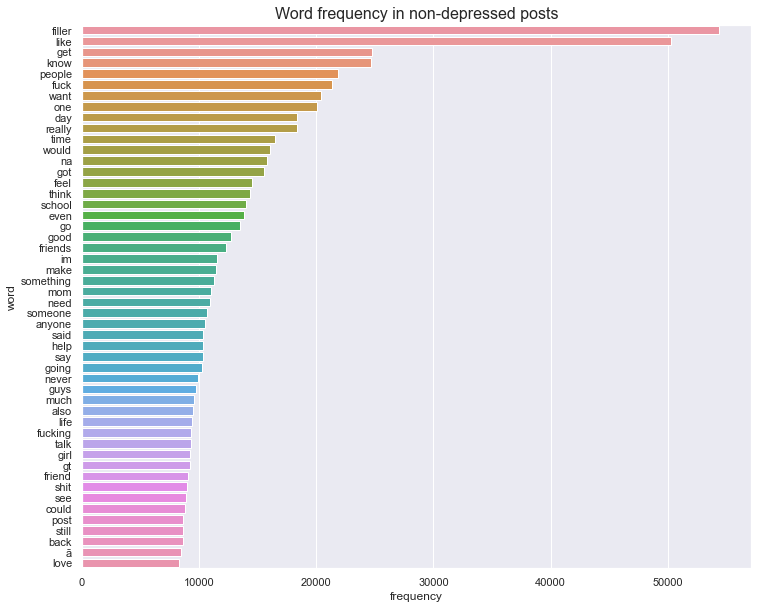

In [ ]:
filtered_frequency_non_suicide_df = frequency_non_suicide_df[~frequency_non_suicide_df['word'].isin(stopwords_filtered)]
filtered_frequency_non_suicide_df = filtered_frequency_non_suicide_df[filtered_frequency_non_suicide_df['word'].apply(lambda w: w.isalpha())]

sns.set(rc={'figure.figsize':(12, 10)})
g = sns.barplot(x="frequency",
                y="word",
                orient='h',
                data=filtered_frequency_non_suicide_df.head(50))
g.set_title('Word frequency in non-depressed posts', {'fontsize': 16})
g.figure.savefig('word_frequency_non_suic.png')

In [ ]:
from sklearn.model_selection import train_test_split
inde =data.text
dep = data['class']
X_train, X_test, y_train, y_test = train_test_split(inde,dep,test_size = 0.2)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver="lbfgs")


from sklearn.pipeline import Pipeline

In [ ]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(X_train, y_train)


from sklearn.metrics import confusion_matrix

predictions = model.predict(X_test)

confusion_matrix(predictions, y_test)

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[21501,  1197],
       [ 1615, 22095]], dtype=int64)

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


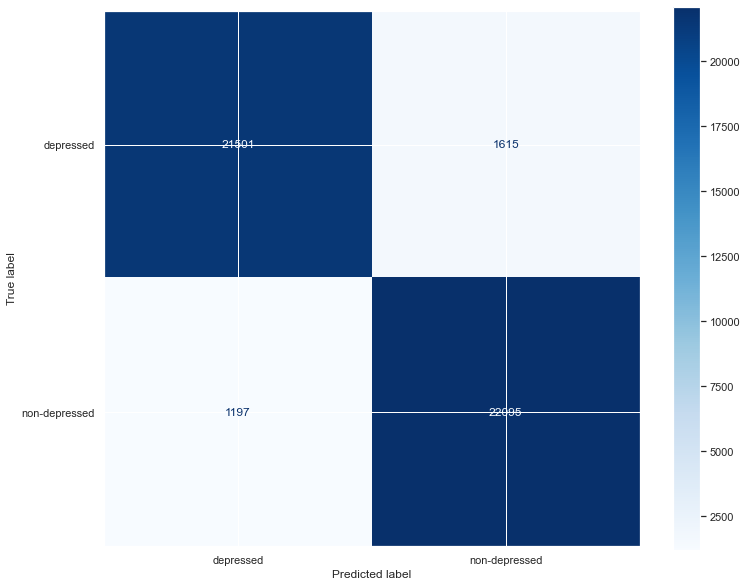

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,y_test,cmap='Blues',display_labels=['depressed','non-depressed'])
plt.show()